# Loading Dataset

In [97]:
import pandas as pd

In [98]:
df = pd.read_csv('CSV/admission_prediction.csv')

In [99]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Preprocessing

In [100]:
df.drop(columns=['Serial No.'], inplace=True)

# Splitting

In [101]:
from sklearn.model_selection import train_test_split as split

In [102]:
train_x, test_x, train_y, test_y = split(df.drop(columns=['Chance of Admit ']), df['Chance of Admit '], test_size=0.2)

# Scaling

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scaler = MinMaxScaler()

In [105]:
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Model Building

In [106]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

In [107]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(4, activation='relu', input_dim=7))
model.add(Dense(3, activation='relu', input_dim=7))
model.add(Dense(2, activation='relu', input_dim=7))
model.add(Dense(1, activation='linear'))

/home/user/machine-learning/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114 (456.00 B)

 Trainable params: 114 (456.00 B)

 Non-trainable params: 0 (0.00 B)

In [109]:
model.compile(loss='mean_squared_error', optimizer='Adam')

# Model Training

In [110]:
history = model.fit(train_x, train_y, validation_split=0.1, epochs=140)

Epoch 1/140


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.5037 - val_loss: 0.4289
Epoch 2/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4208 - val_loss: 0.3427
Epoch 3/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3313 - val_loss: 0.2562
Epoch 4/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2501 - val_loss: 0.1722
Epoch 5/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1706 - val_loss: 0.1023
Epoch 6/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1069 - val_loss: 0.0508
Epoch 7/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0528 - val_loss: 0.0221
Epoch 8/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0261 - val_loss: 0.0120
Epoch 9/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 - val_loss: 0.0118
Epoch 10/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 11/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - val_loss: 0.0127
Epoch 12/140
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - val_l

In [111]:
predict = model.predict(test_x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


# Model Evaluation

In [112]:
from sklearn.metrics import r2_score as score

In [113]:
score(test_y, predict)

0.807257515910349

# Graphical Analysis

In [114]:
import matplotlib.pyplot as plt

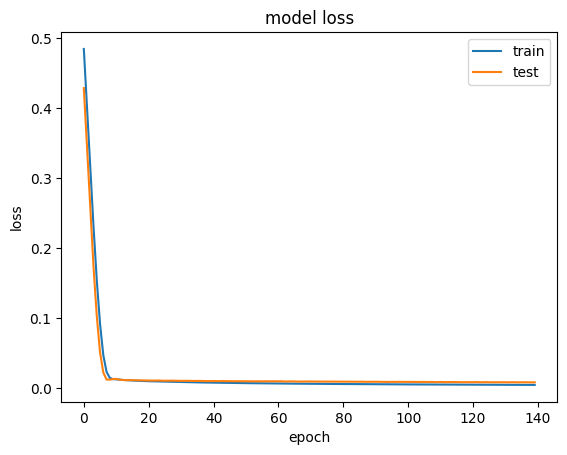

In [116]:
plt.plot(history.history['loss'])
# Suggested code may be subject to a license. Learn more: ~LicenseLog:1166392569.
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
